In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib_venn import venn2
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import upsetplot
from scipy import stats
import pandas as pd

In [6]:
def get_talon_nov_colors():
    c_dict = {'Known': '#009E73',
              'ISM': '#0072B2',
              'NIC': '#D55E00',
              'NNC': '#E69F00',
              'Antisense': '#000000',
              'Intergenic': '#CC79A7',
              'Genomic': '#F0E442'}
    order = ['Known', 'ISM', 'NIC', 'NNC', 'Antisense', 'Intergenic', 'Genomic']
    
    return c_dict, order

def add_perc(ax, data, feature):
    total = data[feature].sum()
    ylim = ax.get_ylim()[1]
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.45
        y = p.get_y() + p.get_height() + ylim*0.00625
        ax.annotate(percentage, (x, y), size = 12)
        
def plot_read_novelty(df, opref, c_dict, order,
                      ylim=None, title=None, 
                      datasets='all'):
    sns.set_context("paper", font_scale=1.6)
    
    temp = df.copy(deep=True)
    
    # filter on datasets
    if datasets != 'all':
        temp = temp.loc[temp.dataset.isin(datasets)]        
    
    # count number of reads per cat
    temp = temp[['transcript_novelty', 'read_name']].groupby('transcript_novelty').count()
    temp.reset_index(inplace=True)
    temp.rename({'read_name':'counts'}, axis=1, inplace=True)
    print(temp)
    
    # actual plotting
    g = sns.catplot(data=temp, x='transcript_novelty',
                y='counts', kind='bar', 
                palette=c_dict, order=order)
    [plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
    g.set_ylabels('Reads')
    g.set_xlabels('Transcript novelty')
    
    # add percentage labels
    ax = g.axes[0,0]
    add_perc(ax, temp, 'counts')
    
    if ylim:
        g.set(ylim=(0,ylim))
    
    # add title
    if not title:
        g.fig.suptitle('Reads per novelty category')
    else:
        g.fig.suptitle('{} reads per novelty category'.format(title))
        
    # save figure
    fname = '{}_read_novelty'.format(opref)
    g.savefig(fname+'.pdf', dpi=300)
    
def plot_transcript_novelty(df, oprefix, c_dict, order, \
                            ylim=None, title=None,
                            whitelist=None, datasets='all', save_type='pdf'):
    sns.set_context('paper', font_scale=1.6)
    
    temp = df.copy(deep=True)
    
    # remove transcripts that are not on whitelist
    if whitelist:
        temp = temp.loc[temp.transcript_ID.isin(whitelist)]
    
    # filter on datasets
    if datasets != 'all':
        temp = temp.loc[temp.dataset.isin(datasets)]        
    
    # count number of isoforms per cat
    temp = temp[['transcript_ID', 'transcript_novelty', 'read_name']].groupby(['transcript_ID', 'transcript_novelty']).count()
    temp.reset_index(inplace=True)
    temp.drop('read_name', axis=1, inplace=True)
    temp = temp.groupby('transcript_novelty').count()
    temp.reset_index(inplace=True)
    temp.rename({'transcript_ID': 'counts'}, axis=1, inplace=True)
    print(temp)
    
    # actual plotting
    g = sns.catplot(data=temp, x='transcript_novelty',
                y='counts', kind='bar', 
                palette=c_dict, order=order)
    [plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
    g.set_ylabels('Isoforms')
    g.set_xlabels('Transcript novelty')
    
    # add percentage labels
    ax = g.axes[0,0]
    add_perc(ax, temp, 'counts')
    
    if ylim:
        g.set(ylim=(0,ylim))
    
    # add title
    if not title:
        g.fig.suptitle('Transcript models per novelty category')
    else:
        g.fig.suptitle('{} transcript models per novelty category'.format(title))
        
    # save figure
    fname = '{}_isoform_novelty'.format(oprefix)
    if save_type == 'png':
        g.savefig(fname+'.png', dpi=300)        
    elif save_type == 'pdf':
        g.savefig(fname+'.pdf', dpi=300)        
    
    plt.show()
    plt.clf()

In [ ]:
# with just bam tag change + reversing fastq reads

In [17]:
read_annot = 'data/230418/talon/annot_talon_read_annot.tsv'
filt_ab = 'data/230418/talon/annot_talon_abundance_filtered.tsv'

  transcript_novelty   counts
0          Antisense     9725
1            Genomic    13959
2                ISM  1406787
3         Intergenic     4699
4              Known  7080683
5                NIC   676050
6                NNC   538026


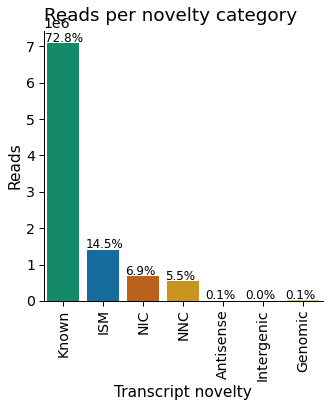

In [18]:
df = pd.read_csv(read_annot,sep='\t')
c_dict, order = get_talon_nov_colors()
opref = 'test'
plot_read_novelty(df, opref, c_dict, order,
                      ylim=None, title=None, 
                      datasets='all')

In [15]:
# post minimap reads
3633544+4507237+3836377+4911352

16888510

In [16]:
# post tc reads
2242793+2700697+2299489+3024691

10267670

In [19]:
# post talon reads
len(df.index)

9729929

In [ ]:
# with just bam tag change

In [7]:
read_annot = 'data/230418/talon/annot_talon_read_annot.tsv'
filt_ab = 'data/230418/talon/annot_talon_abundance_filtered.tsv'

In [8]:
df = pd.read_csv(read_annot,sep='\t')

  transcript_novelty   counts
0          Antisense     9726
1            Genomic    13939
2                ISM  1406832
3         Intergenic     4692
4              Known  7080673
5                NIC   676048
6                NNC   538010


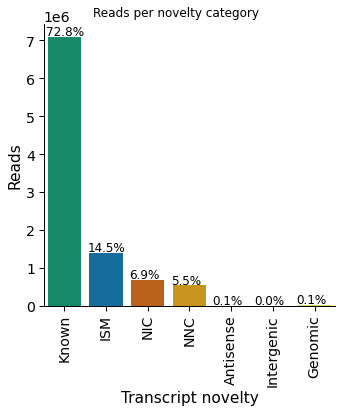

In [9]:
c_dict, order = get_talon_nov_colors()
opref = 'test'
plot_read_novelty(df, opref, c_dict, order,
                      ylim=None, title=None, 
                      datasets='all')

In [10]:
# post minimap reads
3633558+4507243+3836381+4911342

16888524

In [12]:
# post tc reads
2242821+2700669+2299503+3024671

10267664

In [13]:
# post talon reads
len(df.index)

9729920

In [14]:
6/16

0.375